To begin with, we choose the USDX from 01/01/2020 to 01/01/2021 to do the EDA. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from matplotlib.pyplot import figure

In [2]:
dfUSDX=pd.read_csv('/content/US Dollar Index Futures Historical Data.csv')
dfUSDX.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 31, 2020",89.894,89.520,89.965,89.475,13.09K,0.27%
1,"Dec 30, 2020",89.649,89.868,89.900,89.515,-,-0.30%
2,"Dec 29, 2020",89.918,90.160,90.165,89.785,17.25K,-0.40%
3,"Dec 28, 2020",90.275,90.260,90.320,89.895,18.46K,0.03%
4,"Dec 24, 2020",90.250,90.185,90.310,90.075,10.83K,-0.10%


In [3]:
from datetime import datetime
dfUSDX['Date'] = pd.to_datetime(dfUSDX['Date'])
dfUSDX.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-12-31,89.894,89.520,89.965,89.475,13.09K,0.27%
1,2020-12-30,89.649,89.868,89.900,89.515,-,-0.30%
2,2020-12-29,89.918,90.160,90.165,89.785,17.25K,-0.40%
3,2020-12-28,90.275,90.260,90.320,89.895,18.46K,0.03%
4,2020-12-24,90.250,90.185,90.310,90.075,10.83K,-0.10%


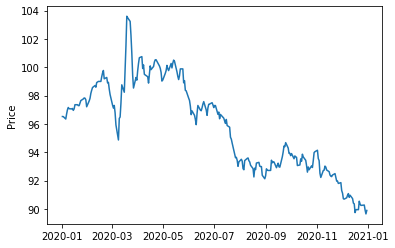

<Figure size 1440x1152 with 0 Axes>

In [4]:
plt.plot(dfUSDX['Date'],dfUSDX['Price'])
plt.ylabel('Price')
plt.figure(figsize=(20,16))
plt.show()

Combined the historical data and news we knew that during the downtrend of the US stock market (e.g., the starting stage of the covid-19 pandemic), the USDX flctuated severely . We choose 2020-02-01 to 2020-05-01 as o

In [5]:
start_date = '2020-02-01'
end_date = '2020-05-01'

In [6]:
USDXchosen_date = (dfUSDX['Date'] > start_date) & (dfUSDX['Date'] <= end_date)

In [7]:
dfUSDX1 = dfUSDX.loc[USDXchosen_date]

In [8]:
dfUSDX1.drop(dfUSDX1[dfUSDX1.Date=='2020-02-17'].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
dfUSDX1 = dfUSDX1.loc[::-1].reset_index(drop=True)

In [10]:
dfUSDX1 = dfUSDX1.rename(columns={'Price': 'Close'})

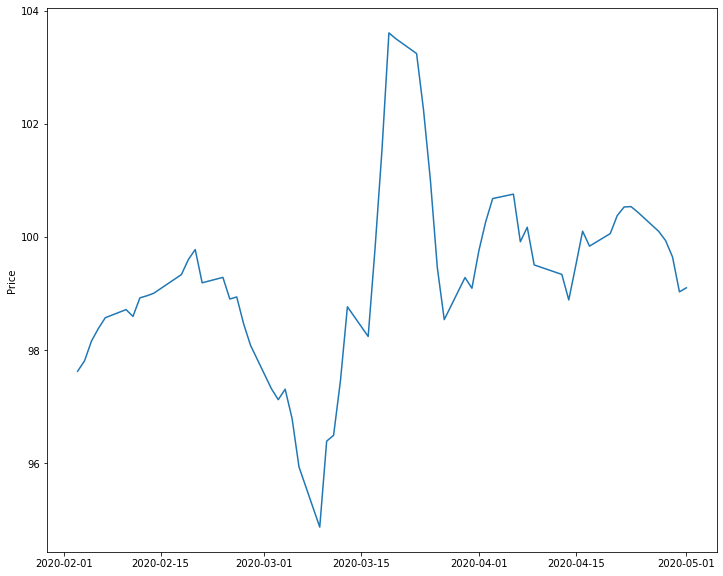

In [11]:
fig=plt.figure()
plt.plot(dfUSDX1['Date'], dfUSDX1['Close'])
fig.set_figheight(10)
fig.set_figwidth(12)
plt.ylabel('Price')
plt.show()

In [12]:
USDXreturn_rate = (dfUSDX1['Close'].iloc[-1] - dfUSDX1['Close'].iloc[0])/dfUSDX1['Close'].iloc[0]
print("The return is ""{:.0%}".format(USDXreturn_rate))

The return is 2%




---



---



---



---



---



In [13]:
dfQQQ=pd.read_csv('/content/QQQ.csv')

In [14]:
dfQQQ['Date'] = pd.to_datetime(dfQQQ['Date'])
dfQQQ.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,214.399994,216.160004,213.979996,216.160004,214.178970,30969400
1,2020-01-03,213.300003,215.470001,213.279999,214.179993,212.217148,27518900
2,2020-01-06,212.500000,215.589996,212.240005,215.559998,213.584488,21655300
3,2020-01-07,215.639999,216.139999,214.850006,215.529999,213.554764,22139300
4,2020-01-08,215.500000,218.139999,215.160004,217.149994,215.159927,26397300


In [15]:
QQQchosen_date = (dfQQQ['Date'] > start_date) & (dfQQQ['Date'] <= end_date)
dfQQQ1 = dfQQQ.loc[QQQchosen_date]

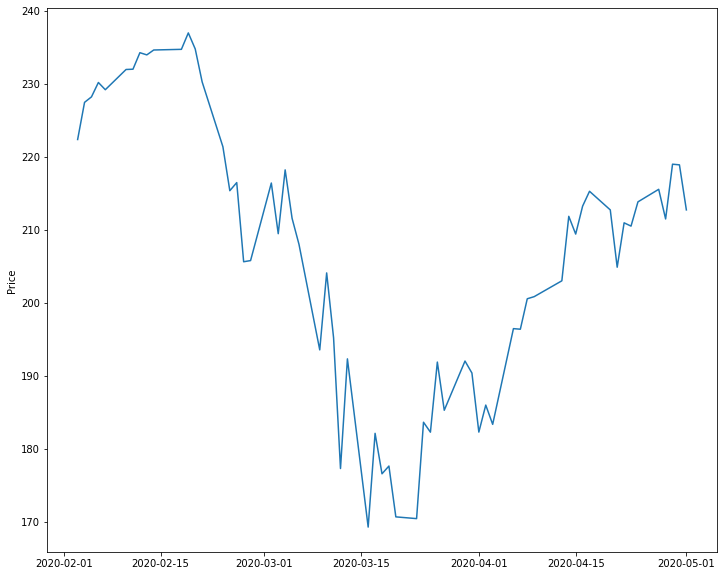

In [16]:
fig=plt.figure()
plt.plot(dfQQQ1['Date'], dfQQQ1['Close'])
fig.set_figheight(10)
fig.set_figwidth(12)
plt.ylabel('Price')
plt.show()

In [17]:
QQQ_max = dfQQQ1['Close'].max(axis=0)
QQQ_min = dfQQQ1['Close'].min(axis=0)
QQQ_max_plunge = (QQQ_max-QQQ_min)/QQQ_max
print("The maxiumn plunge is ""{:.0%}".format(QQQ_max_plunge))

The maxiumn plunge is 29%


In [18]:
dfQQQ2 = dfQQQ.loc[(dfQQQ['Date'] > '2020-03-18') & (dfQQQ['Date'] <= end_date)]

In [19]:
QQQ_rebound_max = dfQQQ2['Close'].max(axis=0)
QQQ_min = dfQQQ1['Close'].min(axis=0)
QQQ_max_rebound = (QQQ_rebound_max-QQQ_min)/QQQ_min
print("The maxiumn rebound is ""{:.0%}".format(QQQ_max_rebound))

The maxiumn rebound is 29%


In [20]:
QQQreturn_rate = (dfQQQ1['Close'].iloc[-1] - dfQQQ1['Close'].iloc[0])/dfQQQ1['Close'].iloc[0]
print("The return is ""{:.0%}".format(QQQreturn_rate))

The return is -4%




---



In [21]:
dfXLE=pd.read_csv('/content/XLE.csv')

In [22]:
dfXLE['Date'] = pd.to_datetime(dfXLE['Date'])
dfXLE.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,60.439999,60.669998,60.230000,60.580002,54.964684,11944700
1,2020-01-03,61.130001,61.310001,60.099998,60.400002,54.801365,29502900
2,2020-01-06,60.610001,61.180000,60.400002,60.869999,55.227795,22458100
3,2020-01-07,60.700001,60.770000,60.000000,60.709999,55.082626,11462500
4,2020-01-08,60.650002,60.720001,59.630001,59.709999,54.175320,19021400


In [23]:
XLEchosen_date = (dfXLE['Date'] > start_date) & (dfXLE['Date'] <= end_date)
dfXLE1 = dfXLE.loc[XLEchosen_date]

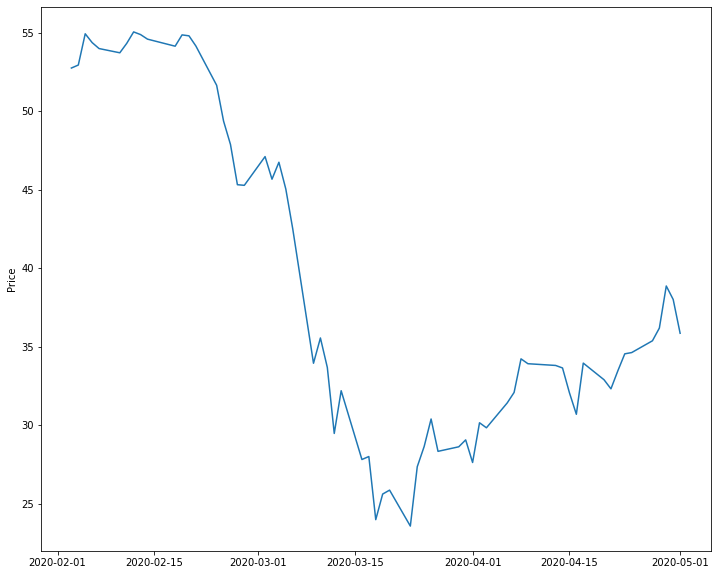

In [24]:
fig=plt.figure()
plt.plot(dfXLE1['Date'], dfXLE1['Close'])
fig.set_figheight(10)
fig.set_figwidth(12)
plt.ylabel('Price')
plt.show()

In [25]:
XLE_max = dfXLE1['Close'].max(axis=0)
XLE_min = dfXLE1['Close'].min(axis=0)
XLE_max_plunge = (XLE_max-XLE_min)/XLE_max
print("The maxiumn plunge is ""{:.0%}".format(XLE_max_plunge))

The maxiumn plunge is 57%


In [26]:
dfXLE2 = dfXLE.loc[(dfXLE['Date'] > '2020-03-18') & (dfXLE['Date'] <= end_date)]

In [27]:
XLE_rebound_max = dfXLE2['Close'].max(axis=0)
XLE_min = dfXLE1['Close'].min(axis=0)
XLE_max_rebound = (XLE_rebound_max-XLE_min)/XLE_min
print("The maxiumn rebound is ""{:.0%}".format(XLE_max_rebound))

The maxiumn rebound is 65%


In [28]:
XLEreturn_rate = (dfXLE1['Close'].iloc[-1] - dfXLE1['Close'].iloc[0])/dfXLE1['Close'].iloc[0]
print("The return is ""{:.0%}".format(XLEreturn_rate))

The return is -32%




---



In [29]:
dfXLV=pd.read_csv('/content/XLV.csv')

In [30]:
dfXLV['Date'] = pd.to_datetime(dfXLV['Date'])
dfXLV.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,102.169998,102.290001,101.400002,102.129997,99.307144,6277400
1,2020-01-03,100.949997,101.820000,100.449997,101.239998,98.441734,8247500
2,2020-01-06,100.779999,101.900002,100.750000,101.870003,99.054329,6441800
3,2020-01-07,101.589996,101.760002,101.099998,101.669998,98.859856,6335300
4,2020-01-08,101.720001,102.790001,101.680000,102.330002,99.501617,7494700


In [31]:
XLVchosen_date = (dfXLV['Date'] > start_date) & (dfXLV['Date'] <= end_date)
dfXLV1 = dfXLV.loc[XLVchosen_date]

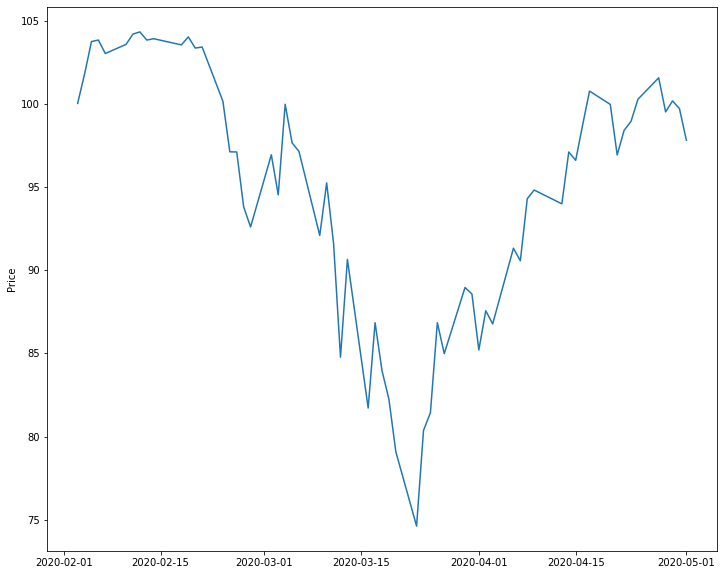

In [32]:
fig=plt.figure()
plt.plot(dfXLV1['Date'], dfXLV1['Close'])
fig.set_figheight(10)
fig.set_figwidth(12)
plt.ylabel('Price')
plt.show()

In [33]:
XLV_max = dfXLV1['Close'].max(axis=0)
XLV_min = dfXLV1['Close'].min(axis=0)
XLV_max_plunge = (XLV_max-XLV_min)/XLV_max
print("The maxiumn plunge is ""{:.0%}".format(XLV_max_plunge))

The maxiumn plunge is 28%


In [34]:
dfXLV2 = dfXLV.loc[(dfXLV['Date'] > '2020-03-18') & (dfXLV['Date'] <= end_date)]

In [35]:
XLV_rebound_max = dfXLV2['Close'].max(axis=0)
XLV_min = dfXLV1['Close'].min(axis=0)
XLV_max_rebound = (XLV_rebound_max-XLV_min)/XLV_min
print("The maxiumn rebound is ""{:.0%}".format(XLV_max_rebound))

The maxiumn rebound is 36%


In [36]:
XLVreturn_rate = (dfXLV1['Close'].iloc[-1] - dfXLV1['Close'].iloc[0])/dfXLV1['Close'].iloc[0]
print("The return is ""{:.0%}".format(XLVreturn_rate))

The return is -2%




---



---



---



---



---



---



---



In [37]:
dfUSDX1

,Date,Close,Open,High,Low,Vol.,Change %
0,2020-02-03,97.625,97.245,97.755,97.230,18.79K,0.42%
1,2020-02-04,97.809,97.645,97.855,97.635,11.60K,0.19%
2,2020-02-05,98.158,97.800,98.180,97.760,18.14K,0.36%
3,2020-02-06,98.381,98.180,98.445,98.075,14.24K,0.23%
4,2020-02-07,98.571,98.335,98.600,98.300,13.51K,0.19%
...,...,...,...,...,...,...,...
58,2020-04-27,100.097,100.270,100.370,99.840,11.46K,-0.34%
59,2020-04-28,99.934,100.155,100.295,99.485,13.66K,-0.16%
60,2020-04-29,99.644,99.935,99.955,99.515,10.39K,-0.29%
61,2020-04-30,99.028,99.550,99.800,98.830,26.66K,-0.62%


In [38]:
dfXLV1.reset_index(inplace = True)
dfXLV1.drop(['index'], axis=1)
dfXLE1.reset_index(inplace = True)
dfXLE1.drop(['index'], axis=1)
dfQQQ1.reset_index(inplace = True)
dfQQQ1.drop(['index'], axis=1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,220.139999,222.889999,219.990005,222.380005,220.341995,25408600
1,2020-02-04,225.419998,227.860001,224.649994,227.470001,225.385345,30691200
2,2020-02-05,230.210007,230.250000,226.850006,228.220001,226.128479,38534800
3,2020-02-06,228.789993,230.250000,227.979996,230.190002,228.080414,22467100
4,2020-02-07,229.160004,230.440002,228.539993,229.199997,227.099472,25884900
...,...,...,...,...,...,...,...
58,2020-04-27,216.190002,216.630005,214.500000,215.559998,214.039642,36451700
59,2020-04-28,217.320007,217.320007,211.210007,211.500000,210.008286,46862800
60,2020-04-29,216.190002,219.970001,215.139999,219.000000,217.455383,48716400
61,2020-04-30,219.949997,220.039993,217.350006,218.910004,217.366013,43359500


In [39]:
data = [dfUSDX1['Close'],dfXLV1['Close'],dfXLE1['Close'],dfQQQ1['Close']]

headers = ["USDX", "XLV", "XLE", "QQQ"]

df_close_price = pd.concat(data, axis=1, keys=headers)
df_close_price

,USDX,XLV,XLE,QQQ
0,97.625,100.040001,52.740002,222.380005
1,97.809,101.800003,52.930000,227.470001
2,98.158,103.760002,54.919998,228.220001
3,98.381,103.849998,54.360001,230.190002
4,98.571,103.040001,53.980000,229.199997
...,...,...,...,...
58,100.097,101.580002,35.369999,215.559998
59,99.934,99.529999,36.180000,211.500000
60,99.644,100.190002,38.860001,219.000000
61,99.028,99.730003,38.000000,218.910004





---



---



---



---



---



---



---



### Daily Return

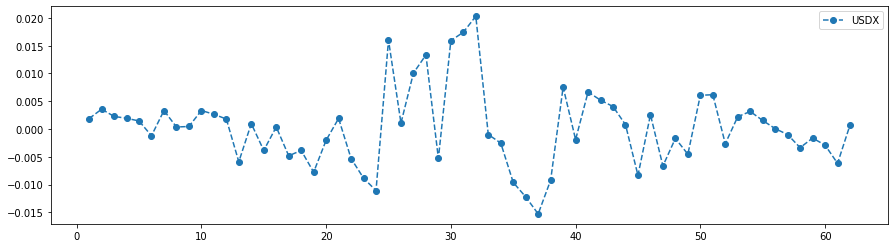

In [40]:
USDX_Daily_Return = df_close_price['USDX'].pct_change()
USDX_Daily_Return.plot(figsize=(15,4),legend=True,linestyle='--',marker='o')
plt.ioff()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



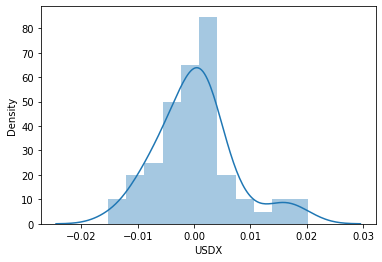

In [41]:
sns.distplot(USDX_Daily_Return)
plt.ioff()

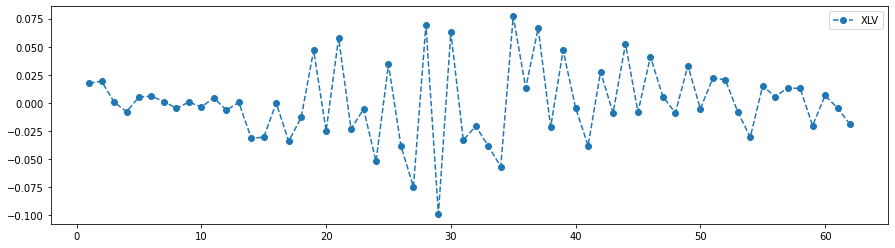

In [42]:
XLV_Daily_Return = df_close_price['XLV'].pct_change()
XLV_Daily_Return.plot(figsize=(15,4),legend=True,linestyle='--',marker='o')
plt.ioff()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



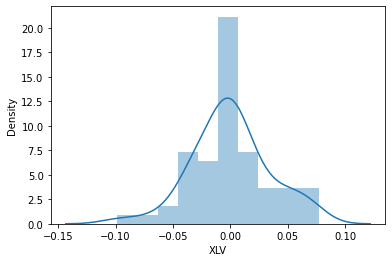

In [43]:
sns.distplot(XLV_Daily_Return)
plt.ioff()

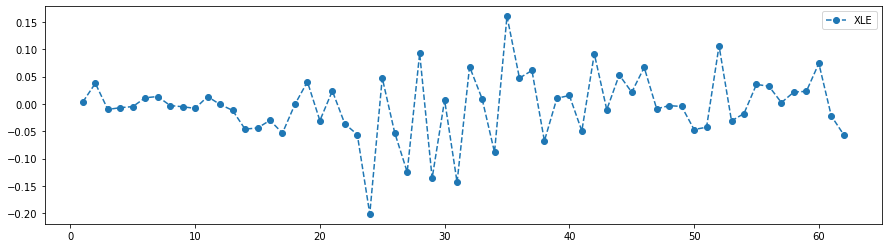

In [44]:
XLE_Daily_Return = df_close_price['XLE'].pct_change()
XLE_Daily_Return.plot(figsize=(15,4),legend=True,linestyle='--',marker='o')
plt.ioff()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



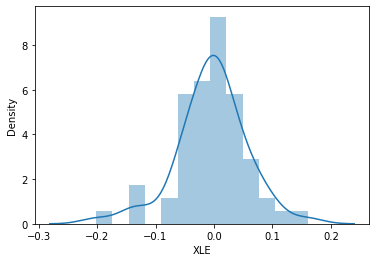

In [45]:
sns.distplot(XLE_Daily_Return)
plt.ioff()

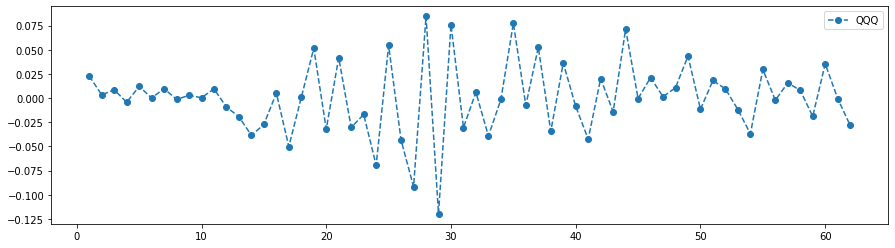

In [46]:
QQQ_Daily_Return = df_close_price['QQQ'].pct_change()
QQQ_Daily_Return.plot(figsize=(15,4),legend=True,linestyle='--',marker='o')
plt.ioff()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



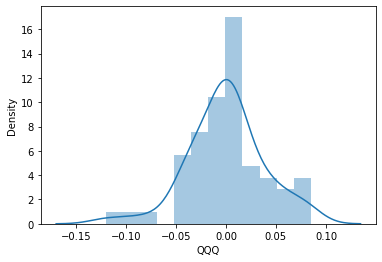

In [47]:
sns.distplot(QQQ_Daily_Return)
plt.ioff()

### Correlation Analysis

In [48]:
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

The Pearson correlation coefficient and p-value of USDX and QQQ are as below:
(-0.3512255299688159, 0.004765594212699555)


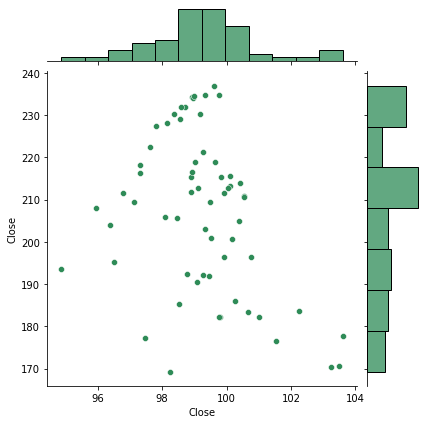

In [49]:
sns.jointplot(dfUSDX1['Close'],dfQQQ1['Close'],kind='scatter',color='seagreen')
print("The Pearson correlation coefficient and p-value of USDX and QQQ are as below:")
print(stats.pearsonr(dfUSDX1['Close'], dfQQQ1['Close']))

The Pearson correlation coefficient and p-value of USDX and XLV are as below:
(-0.40439520992540845, 0.0010121247766638351)


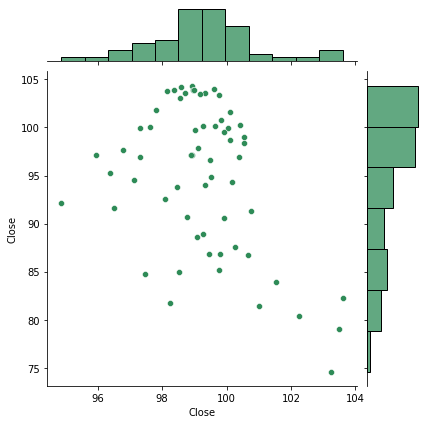

In [50]:
import warnings
warnings.filterwarnings("ignore")

sns.jointplot(dfUSDX1['Close'],dfXLV1['Close'],kind='scatter',color='seagreen')
print("The Pearson correlation coefficient and p-value of USDX and XLV are as below:")
print(stats.pearsonr(dfUSDX1['Close'], dfXLV1['Close']))

The Pearson correlation coefficient and p-value of USDX and XLE are as below:
(-0.44596784590726263, 0.00024914125267698977)


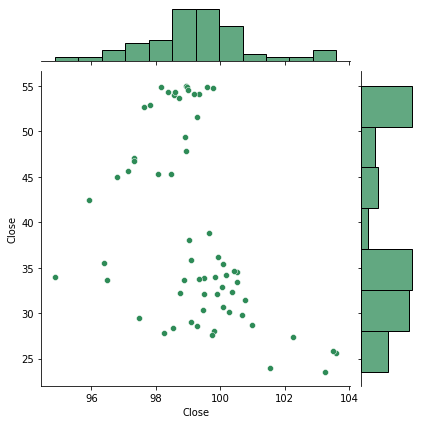

In [51]:
sns.jointplot(dfUSDX1['Close'],dfXLE1['Close'],kind='scatter',color='seagreen')
print("The Pearson correlation coefficient and p-value of USDX and XLE are as below:")
print(stats.pearsonr(dfUSDX1['Close'], dfXLE1['Close']))

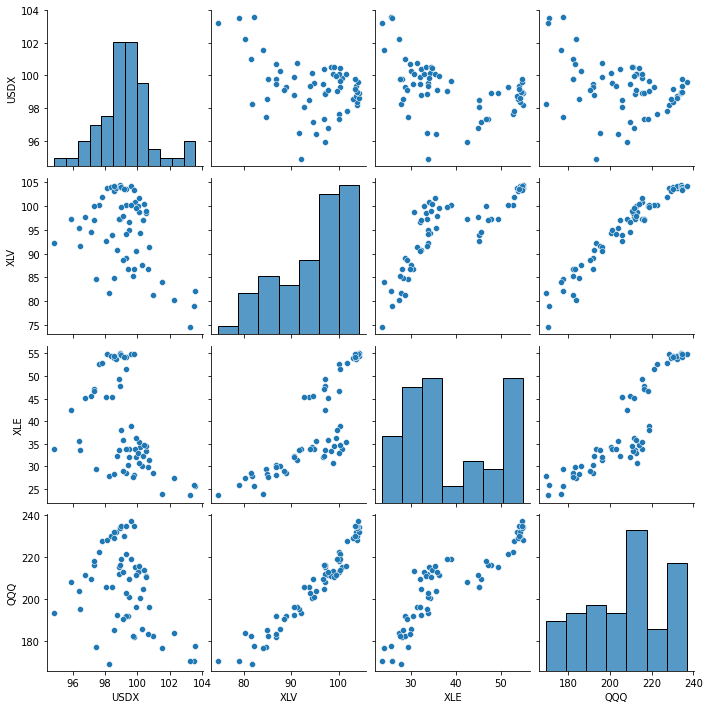

In [52]:
#斜对角线是各个指数的价格频率分布 USDX 是bell-shaped， XLV和QQQ价格高的点多， XLE价格低的点多
#散点图能看相关性 USDX 和剩下的都是负相关
sns.pairplot(df_close_price.dropna())
plt.ioff()

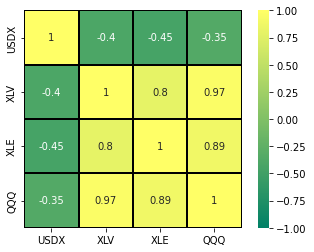

In [53]:
#热力图 结论同上图
sns.heatmap(df_close_price.corr(),annot=True,cmap='summer',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.show()

### Risk Analysis

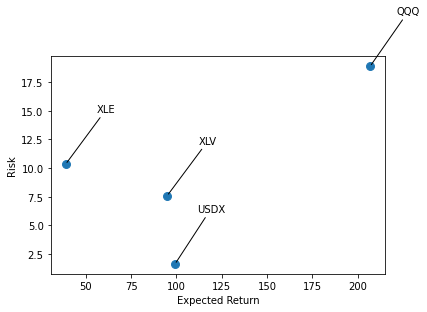

In [54]:
#横纵坐标只表示相对关系 没有实际数值的含义
area=np.pi*20
plt.scatter(df_close_price.mean(),df_close_price.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x,y in zip(df_close_price.columns,df_close_price.mean(),df_close_price.std()):
    plt.annotate(
        label,
        xy=(x,y),xytext=(50,50),
        textcoords='offset points',ha='right',va='bottom',
        arrowprops=dict(arrowstyle='-',connectionstyle='arc,rad=-0.3'))


### Forecasting Price


In [70]:
dfUSDX_10=pd.read_csv('/content/USDX_10years.csv') 
dfUSDX_10

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 01, 2020",99.100,99.130,99.225,98.765,12.23K,0.07%
1,"Apr 30, 2020",99.028,99.550,99.800,98.830,26.66K,-0.62%
2,"Apr 29, 2020",99.644,99.935,99.955,99.515,10.39K,-0.29%
3,"Apr 28, 2020",99.934,100.155,100.295,99.485,13.66K,-0.16%
4,"Apr 27, 2020",100.097,100.270,100.370,99.840,11.46K,-0.34%
...,...,...,...,...,...,...,...
2323,"May 06, 2011",75.080,74.260,75.180,74.110,66.99K,0.95%
2324,"May 05, 2011",74.375,73.280,74.420,72.985,61.58K,1.59%
2325,"May 04, 2011",73.213,73.260,73.480,72.860,36.61K,-0.14%
2326,"May 03, 2011",73.315,73.310,73.490,73.010,26.06K,0.24%


In [71]:
dfUSDX_10['Date'] = pd.to_datetime(dfUSDX_10['Date'])
dfUSDX_10

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-05-01,99.100,99.130,99.225,98.765,12.23K,0.07%
1,2020-04-30,99.028,99.550,99.800,98.830,26.66K,-0.62%
2,2020-04-29,99.644,99.935,99.955,99.515,10.39K,-0.29%
3,2020-04-28,99.934,100.155,100.295,99.485,13.66K,-0.16%
4,2020-04-27,100.097,100.270,100.370,99.840,11.46K,-0.34%
...,...,...,...,...,...,...,...
2323,2011-05-06,75.080,74.260,75.180,74.110,66.99K,0.95%
2324,2011-05-05,74.375,73.280,74.420,72.985,61.58K,1.59%
2325,2011-05-04,73.213,73.260,73.480,72.860,36.61K,-0.14%
2326,2011-05-03,73.315,73.310,73.490,73.010,26.06K,0.24%


In [72]:
df_prophet=dfUSDX_10[['Date','Price']]
df_prophet=df_prophet.sort_values('Date')
df_prophet

,Date,Price
2327,2011-05-02,73.139
2326,2011-05-03,73.315
2325,2011-05-04,73.213
2324,2011-05-05,74.375
2323,2011-05-06,75.080
...,...,...
4,2020-04-27,100.097
3,2020-04-28,99.934
2,2020-04-29,99.644
1,2020-04-30,99.028


In [73]:
df_prophet=df_prophet.rename(columns={'Date':'ds','Price':'y'})

In [74]:
import random 
import seaborn as sns
from fbprophet import Prophet
m=Prophet()
m.fit(df_prophet)
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)
forecast

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-05-02,73.924393,72.331275,75.065308,73.924393,73.924393,-0.189847,-0.189847,-0.189847,0.176363,0.176363,0.176363,-0.366210,-0.366210,-0.366210,0.0,0.0,0.0,73.734546
1,2011-05-03,73.944162,72.337029,75.081312,73.944162,73.944162,-0.164784,-0.164784,-0.164784,0.200581,0.200581,0.200581,-0.365366,-0.365366,-0.365366,0.0,0.0,0.0,73.779377
2,2011-05-04,73.963930,72.382752,75.073480,73.963930,73.963930,-0.145396,-0.145396,-0.145396,0.211593,0.211593,0.211593,-0.356989,-0.356989,-0.356989,0.0,0.0,0.0,73.818535
3,2011-05-05,73.983699,72.385990,75.271723,73.983699,73.983699,-0.134208,-0.134208,-0.134208,0.206893,0.206893,0.206893,-0.341100,-0.341100,-0.341100,0.0,0.0,0.0,73.849491
4,2011-05-06,74.003467,72.483708,75.244113,74.003467,74.003467,-0.106224,-0.106224,-0.106224,0.211648,0.211648,0.211648,-0.317872,-0.317872,-0.317872,0.0,0.0,0.0,73.897244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688,2021-04-27,100.922469,87.808962,113.147079,87.774605,113.173400,-0.082946,-0.082946,-0.082946,0.200581,0.200581,0.200581,-0.283528,-0.283528,-0.283528,0.0,0.0,0.0,100.839523
2689,2021-04-28,100.928378,87.951750,113.378968,87.698066,113.256514,-0.101401,-0.101401,-0.101401,0.211593,0.211593,0.211593,-0.312994,-0.312994,-0.312994,0.0,0.0,0.0,100.826977
2690,2021-04-29,100.934287,87.594231,113.511603,87.621526,113.309813,-0.129680,-0.129680,-0.129680,0.206893,0.206893,0.206893,-0.336573,-0.336573,-0.336573,0.0,0.0,0.0,100.804607
2691,2021-04-30,100.940195,87.596442,113.182259,87.544987,113.363113,-0.142030,-0.142030,-0.142030,0.211648,0.211648,0.211648,-0.353679,-0.353679,-0.353679,0.0,0.0,0.0,100.798165


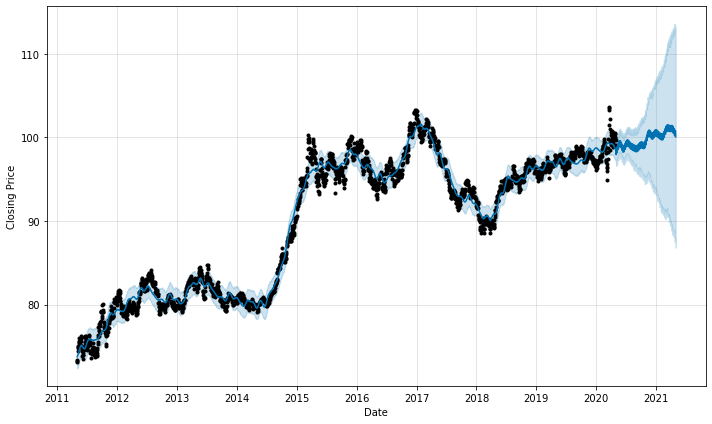

In [75]:
figure=m.plot(forecast,xlabel='Date',ylabel='Closing Price')

In [ ]:
#根据预测 2021年5月USDX应该为100元左右 而实际是90 误差10%